In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import plotly.express as px

# Read the data of strokes
data = pd.read_csv('...\healthcare-dataset-stroke-data.csv')


In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
#total number of patient ids
patients=data["id"].value_counts()
total_patients=len(patients)
total_patients

5110

In [5]:
#check for duplicates
dup_id=data.loc[data.duplicated(subset=['id']), 'id'].unique()
dup_id

array([], dtype=int64)

In [6]:
#fill n/as to 0
data['bmi'] = data['bmi'].fillna(0)
data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

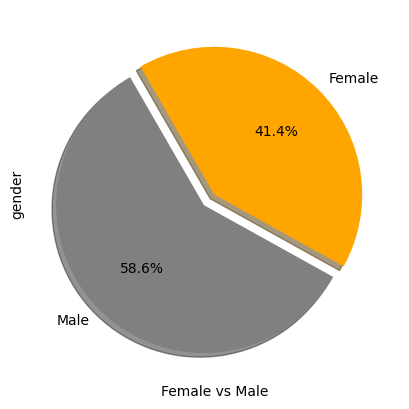

In [8]:

#pie chart using matplotlib
labels=['Male', 'Female']
sizes=[58.6 , 41.4]
explode=(0.1,0)
colors=['grey', 'orange']
plt.ylabel('gender')
plt.xlabel("Female vs Male")
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", startangle=120, shadow=True)
plt.show()

In [9]:
#Correlation for glucose and age
corr=st.pearsonr(data['avg_glucose_level'], data['age'])
print(f"The correlation value of age and the bmi is {round(corr[0],4)}")

The correlation value of age and the bmi is 0.2382


In [10]:
#Regression glucose and age
x_axis=data['age']
y_axis=data['avg_glucose_level']
(slope, intercept, rvalue, pvalue, stderr)= st.linregress(x_axis, y_axis)
regression=x_axis*slope+intercept

pr_regression="y="+str(round(slope,4)) + "x+"+ str(round(intercept,4))

print(f"Slope:{slope}")
print(f"Y-intercept:{intercept}")
print(f"P-Value:{pvalue}")
print(f"R-Value:{rvalue}")
print(f"Standard Error: {stderr}")
      
print(pr_regression)

print(f"R-squared:{rvalue**2}")

Slope:0.4769559310601753
Y-intercept:85.53048694715851
P-Value:7.856310807799507e-67
R-Value:0.23817111410174327
Standard Error: 0.02721339797809469
y=0.477x+85.5305
R-squared:0.056725479592465614


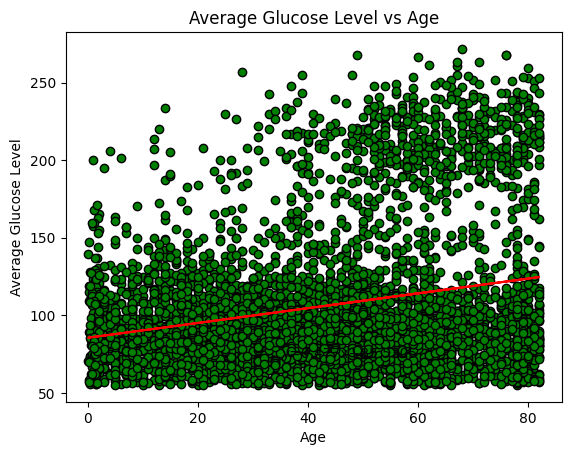

In [33]:
plt.xlabel("Age")
plt.ylabel("Average Glucose Level")
plt.title("Average Glucose Level vs Age")
plt.scatter(x_axis, y_axis, color="green", edgecolors="black")
plt.plot(x_axis, regression, "r-")
plt.annotate(pr_regression,xy=(60,80), horizontalalignment='right', verticalalignment='top')
plt.show()

The correlation value of age and the bmi is 0.2168
Slope:0.09134737451373626
Y-intercept:23.80809415624459
P-Value:2.144734581265127e-55
R-Value:0.21675916928886946
Standard Error: 0.0057562960350737566
y=0.0913x+23.8081
R-squared:0.046984537470800766


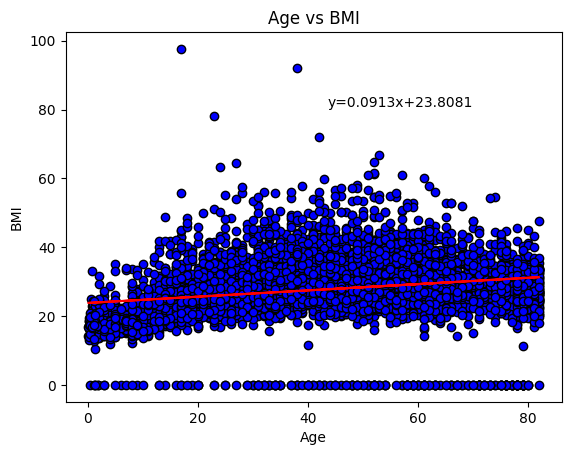

In [11]:
#Correlation for bmi and age
corr=st.pearsonr(data['age'], data['bmi'])
print(f"The correlation value of age and the bmi is {round(corr[0],4)}")

x_axis=data['age']
y_axis=data['bmi']
(slope, intercept, rvalue, pvalue, stderr)= st.linregress(x_axis, y_axis)
regression=x_axis*slope+intercept

pr_regression="y="+str(round(slope,4)) + "x+"+ str(round(intercept,4))

print(f"Slope:{slope}")
print(f"Y-intercept:{intercept}")
print(f"P-Value:{pvalue}")
print(f"R-Value:{rvalue}")
print(f"Standard Error: {stderr}")
      
print(pr_regression)

print(f"R-squared:{rvalue**2}")

plt.xlabel("Age")
plt.ylabel("BMI")
plt.title("Age vs BMI")
plt.scatter(x_axis, y_axis, color="blue", edgecolors="black")
plt.plot(x_axis, regression, "r-")
plt.annotate(pr_regression,xy=(70, 80), horizontalalignment='right', verticalalignment='bottom')
plt.show()

The correlation value of age and the bmi is 0.0821
Slope:0.017280431050687335
Y-intercept:25.922454282857327
P-Value:4.141024952698326e-09
R-Value:0.08211550073269282
Standard Error: 0.00293450469477093
y=0.0173x+25.9225
R-squared:0.006742955460580875


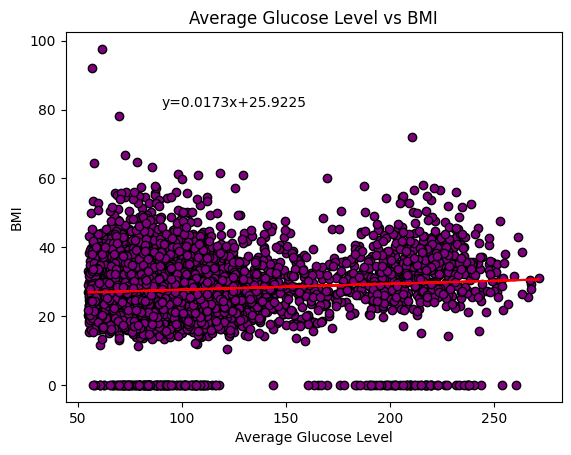

In [12]:
#correlation between glucose and BMI
#Correlation for bmi and age
corr=st.pearsonr(data['avg_glucose_level'], data['bmi'])
print(f"The correlation value of age and the bmi is {round(corr[0],4)}")

x_axis=data['avg_glucose_level']
y_axis=data['bmi']
(slope, intercept, rvalue, pvalue, stderr)= st.linregress(x_axis, y_axis)
regression=x_axis*slope+intercept

pr_regression="y="+str(round(slope,4)) + "x+"+ str(round(intercept,4))

print(f"Slope:{slope}")
print(f"Y-intercept:{intercept}")
print(f"P-Value:{pvalue}")
print(f"R-Value:{rvalue}")
print(f"Standard Error: {stderr}")
      
print(pr_regression)

print(f"R-squared:{rvalue**2}")

plt.xlabel("Average Glucose Level")
plt.ylabel("BMI")
plt.title("Average Glucose Level vs BMI")
plt.scatter(x_axis, y_axis, color="purple", edgecolors="black")
plt.plot(x_axis, regression, "r-")
plt.annotate(pr_regression,xy=(160, 80), horizontalalignment='right', verticalalignment='bottom')
plt.show()

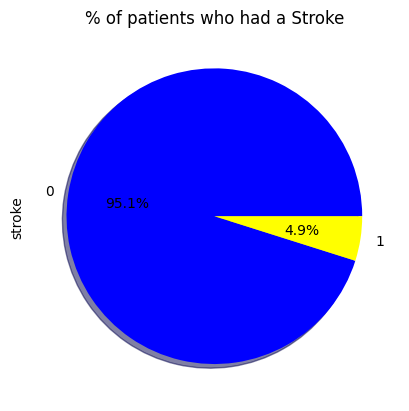

In [19]:
#who had stroke
stroke=data["stroke"].value_counts()
colors=['blue', 'yellow']
stroke.plot.pie(autopct="%1.1f%%", colors = colors, shadow=True)
plt.title("% of patients who had a Stroke")
plt.show()

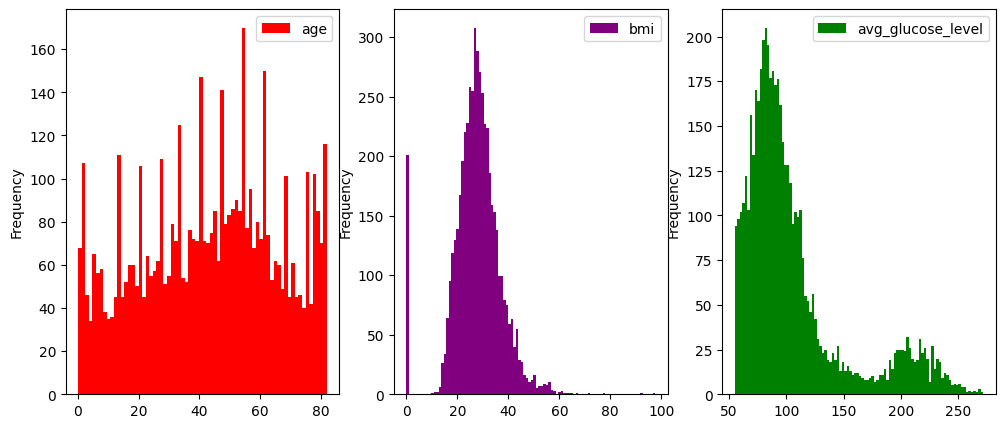

In [18]:
# Set the figure size and create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))

# Plot histogram for age on the first subplot
data.plot(kind="hist", y="age", bins=70, color="red", ax=axes[0])

# Plot histogram for bmi on the second subplot
data.plot(kind="hist", y="bmi", bins=100, color="purple", ax=axes[1])

# Plot histogram for avg_glucose_level on the third subplot
data.plot(kind="hist", y="avg_glucose_level", bins=100, color="green", ax=axes[2])

# Display the plots
plt.show()

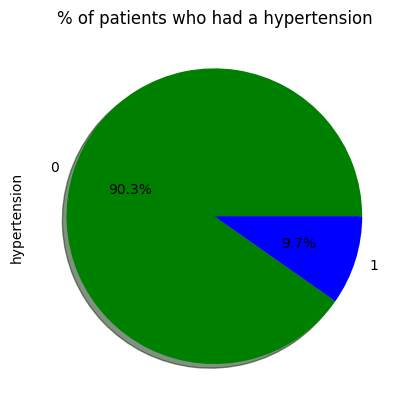

In [20]:
#who had hypertension
stroke=data["hypertension"].value_counts()
colors=['green', 'blue']
stroke.plot.pie(autopct="%1.1f%%", colors = colors, shadow=True)
plt.title("% of patients who had a hypertension")
plt.show()

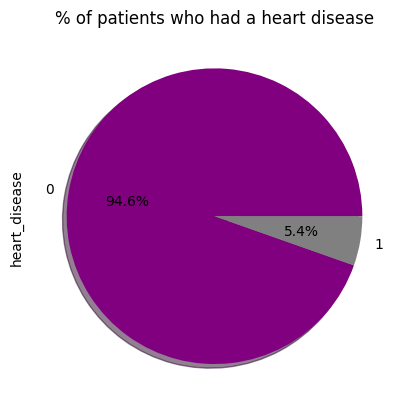

In [22]:
#who had heart disease
stroke=data["heart_disease"].value_counts()
colors=['purple', 'grey']
stroke.plot.pie(autopct="%1.1f%%", colors = colors, shadow=True)
plt.title("% of patients who had a heart disease")
plt.show()